In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [28]:
df = pd.read_csv('../data/raw/reddit_depression_dataset.csv')
df.head()

C:\Users\snrup\AppData\Local\Temp\ipykernel_18228\3591194620.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/reddit_depression_dataset.csv')


,Unnamed: 0,subreddit,title,body,upvotes,created_utc,num_comments,label
0,47951,DeepThoughts,Deep thoughts underdog,"Only when we start considering ourselves, the ...",4.0,1.405309e+09,NaN,0.0
1,47952,DeepThoughts,"I like this sub, there's only two posts yet I ...",Anyway: Human Morality is a joke so long as th...,4.0,1.410568e+09,1.0,0.0
2,47957,DeepThoughts,Rebirth!,Hello. \nI am the new guy in charge here (Besi...,6.0,1.416458e+09,1.0,0.0
3,47959,DeepThoughts,"""I want to be like water. I want to slip throu...",NaN,25.0,1.416512e+09,2.0,0.0
4,47960,DeepThoughts,Who am I?,You could take any one cell in my body and kil...,5.0,1.416516e+09,4.0,0.0


In [29]:
# Subreddit: The subreddit where the post was shared
# Title: The title provided by the user for the post
# Body: The content of the post written by the user
# Upvotes: The number of upvotes the post received
# Created UTC: The time the post was created, given in UTC epoch time
# Number of Comments: The total count of comments on the post
# Label: The category assigned to the post, where 0 indicates normal and 1 indicates depressed

df.columns

Index(['Unnamed: 0', 'subreddit', 'title', 'body', 'upvotes', 'created_utc',
       'num_comments', 'label'],
      dtype='object')

In [30]:
df.shape

(2470778, 8)

In [31]:
df.isnull().sum()

Unnamed: 0           3
subreddit           20
title               23
body            461051
upvotes             64
created_utc        106
num_comments    113977
label              106
dtype: int64

In [32]:
(df['label'].value_counts() / len(df) ) * 100
# Data is imbalanced

label
0.0    80.551996
1.0    19.443714
Name: count, dtype: float64

In [34]:
# Drop rows with missing labels
df = df.dropna(subset=['label'])

In [35]:
df.info()
print("Duplicates:", df.duplicated().sum())

df = df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
Index: 2470672 entries, 0 to 2470777
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    object 
 1   subreddit     object 
 2   title         object 
 3   body          object 
 4   upvotes       float64
 5   created_utc   float64
 6   num_comments  float64
 7   label         float64
dtypes: float64(4), object(4)
memory usage: 169.6+ MB
Duplicates: 0


In [36]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

In [37]:
df['body'] = df['body'].fillna('')
df['title'] = df['title'].fillna('')

df['text'] = df.apply(lambda row: 
                      row['body'] if row['body'].strip() != '' else row['title'], 
                      axis=1)

In [38]:
df = df[df['text'].str.strip() != '']

In [39]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['char_count'] = df['text'].apply(len)

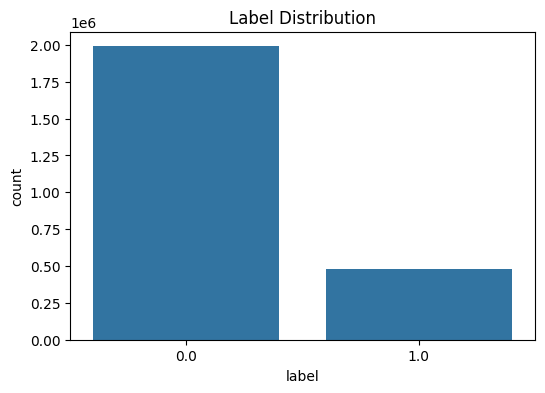

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Label Distribution")
plt.show()

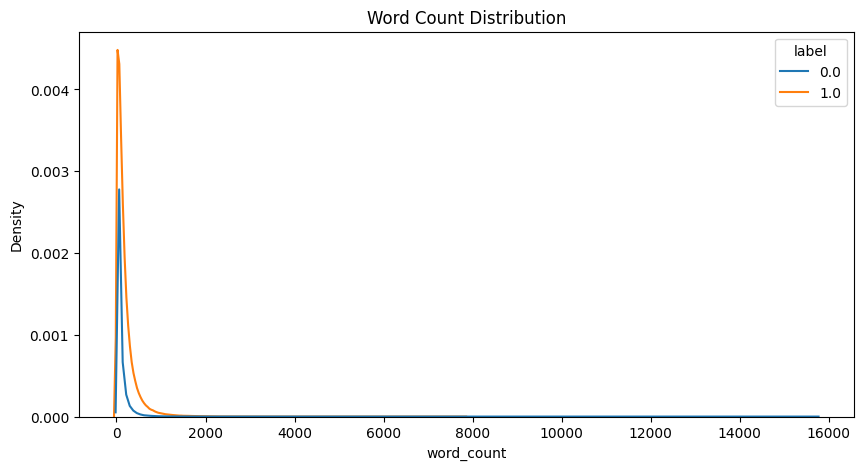

In [41]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='word_count', hue='label', common_norm=False)
plt.title('Word Count Distribution')
plt.show()

In [42]:
import re
from collections import Counter

def clean_text(t):
    t = t.lower()
    t = re.sub(r'[^a-z\s]', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t.strip()

df['clean'] = df['text'].apply(clean_text)

In [43]:
top_normal = Counter(" ".join(df[df['label']==0]['clean']).split()).most_common(30)
top_depressed = Counter(" ".join(df[df['label']==1]['clean']).split()).most_common(30)

print("Normal:", top_normal)
print("Depressed:", top_depressed)

Normal: [('i', 4615820), ('and', 2665085), ('to', 2521153), ('the', 2324461), ('a', 2081496), ('it', 1484394), ('my', 1409019), ('of', 1207073), ('you', 1169483), ('that', 1063236), ('me', 980574), ('in', 958291), ('t', 953674), ('is', 874517), ('s', 821283), ('for', 781397), ('but', 773855), ('so', 741767), ('this', 736843), ('was', 689886), ('m', 668316), ('just', 655266), ('like', 623250), ('have', 615605), ('on', 597040), ('with', 570471), ('she', 556037), ('be', 492671), ('we', 477245), ('do', 451602)]
Depressed: [('i', 7064976), ('to', 3199095), ('and', 2777691), ('the', 2037162), ('my', 1897230), ('a', 1829807), ('it', 1496483), ('of', 1367903), ('t', 1359378), ('me', 1265845), ('that', 1194086), ('in', 1003948), ('m', 946260), ('but', 898480), ('for', 856454), ('have', 819362), ('just', 796525), ('is', 788166), ('this', 718658), ('was', 685940), ('so', 658642), ('with', 654714), ('s', 635526), ('don', 576152), ('be', 568886), ('like', 568496), ('can', 530821), ('you', 513837), 

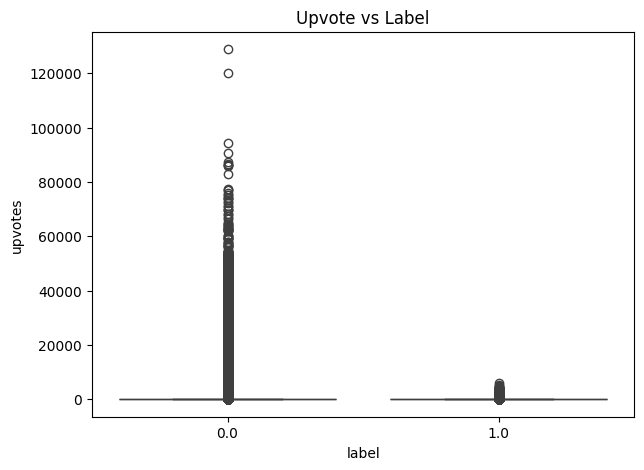

In [44]:
plt.figure(figsize=(7,5))
sns.boxplot(x='label', y='upvotes', data=df)
plt.title("Upvote vs Label")
plt.show()

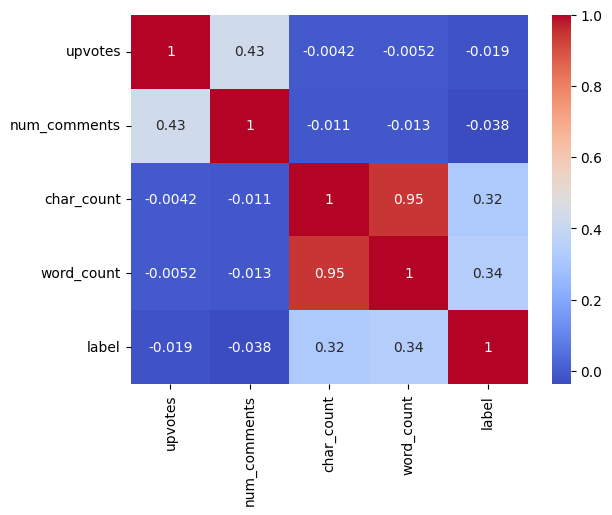

In [49]:
numeric_cols = ['upvotes', 'num_comments', 'char_count', 'word_count', 'label']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()